In [1]:
import pandas as pd
import numpy as np
import altair as alt
import vegafusion as vf
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import importlib

# Add project root to Python path
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

# Now import app modules
import app.data as data
import app.charts as charts
import app.views as views

importlib.reload(data)
importlib.reload(charts)
importlib.reload(views)

# Enable vegafusion for better Altair performance with large datasets
alt.data_transformers.enable("vegafusion")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)




2025-10-15 12:31:29.208 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-15 12:31:29.208 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-15 12:31:29.210 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-15 12:31:29.210 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [2]:
# Load processed data using the data loading function
(df_geo, 
 df_order, 
 df_order_item, 
 df_order_payment, 
 df_order_review, 
 df_product, 
 df_seller, 
 df_customer, 
 df_product_category) = data.load_processed_data()

print(f"Data loaded successfully!")
print(f"   - Orders: {len(df_order):,}")
print(f"   - Customers: {len(df_customer):,}")
print(f"   - Products: {len(df_product):,}")
print(f"   - Order Items: {len(df_order_item):,}")
print(f"   - Reviews: {len(df_order_review):,}")


2025-10-15 12:31:29.215 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-10-15 12:31:29.215 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 12:31:29.276 
  command:

    streamlit run /opt/anaconda3/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-10-15 12:31:29.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 12:31:29.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 12:31:29.783 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 12:31:29.784 Thread 'Thread-4': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-15 12:31:30.273 Thread 'MainThread': missing

Data loaded successfully!
   - Orders: 99,441
   - Customers: 99,441
   - Products: 32,328
   - Order Items: 112,650
   - Reviews: 99,224


# Description and KPI's

## Which Product Categories have the highest sales?

In [3]:
"""
Top Item Categories in Sales
- Top 10 item categories in sales
- Item categories in sales by percentage of total sales
"""

bar_chart = charts.product_categories_by_sales(df_order_item, df_product)
pie_chart = charts.percentage_of_sales_by_product_category(df_order_item, df_product)

bar_chart | pie_chart


alt.HConcatChart(...)

## Which regions have the highest sales and in what categories?

In [4]:
# ARPU and total sales by Region and Product Category

sales_by_region = views.get_revenue_ARPU_by_region(df_customer, 
                                                    df_order, 
                                                    df_geo,
                                                    df_order_item, 
                                                    df_product)

charts.revenue_ARPU_by_region_and_product_category_chart(sales_by_region)


alt.Chart(...)

## View sales over time

In [5]:
# 2016 and 2019 are too low to see any real trends
sales_over_time = views.get_sales_over_time(df_order)
mask = (sales_over_time['order_purchase_year'] == 2018) | (sales_over_time['order_purchase_year'] == 2017)
charts.sales_over_time_chart(sales_over_time[mask])

alt.Chart(...)

# Correlation Analysis

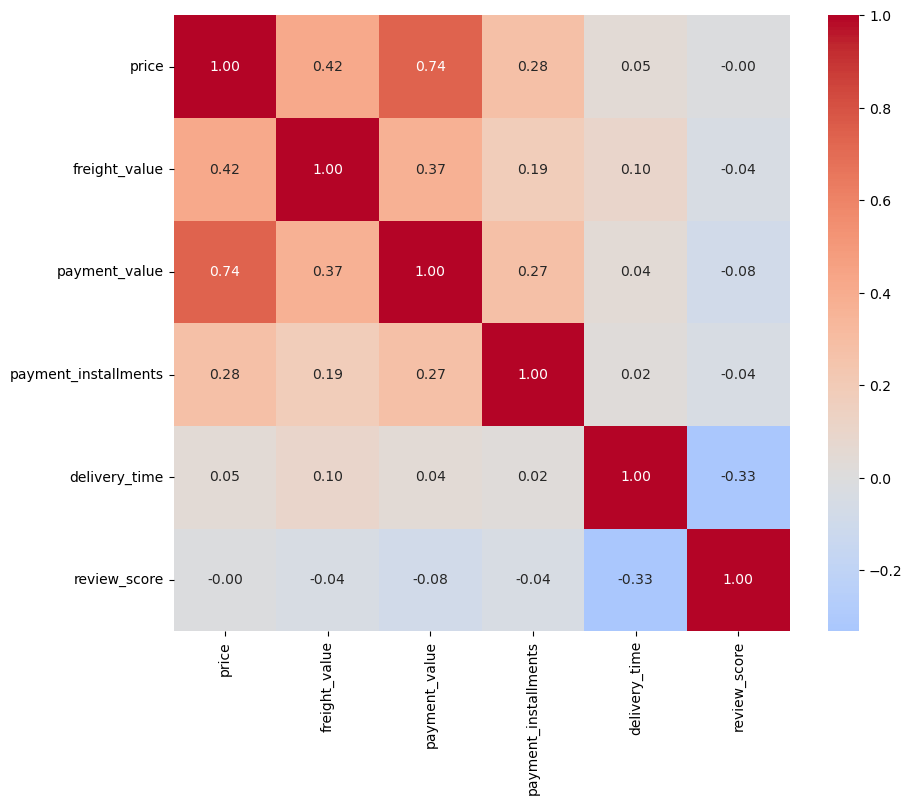

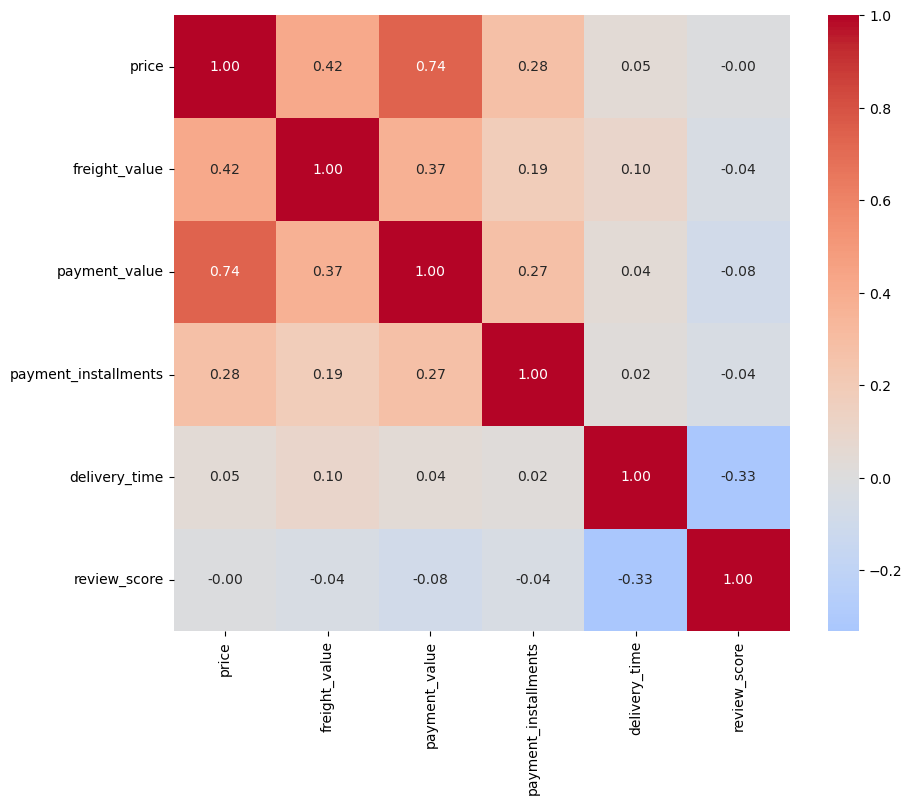

In [6]:
orders_correlation = data.order_merge(df_order, df_order_item, df_order_payment, df_order_review)
charts.orders_correlation_heatmap(orders_correlation)

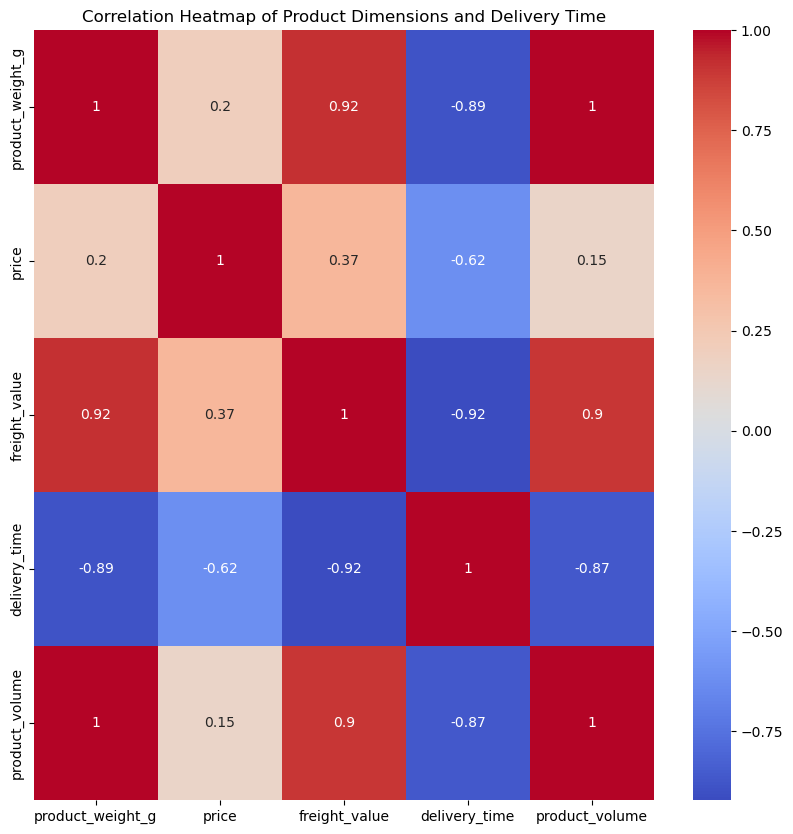

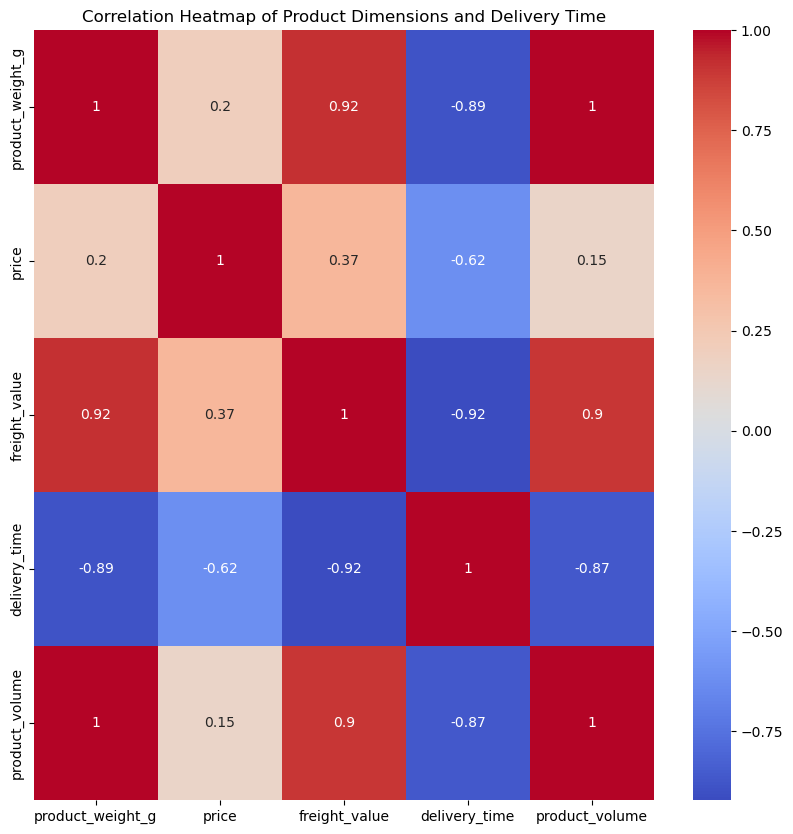

In [7]:
for_analysis = views.get_product_delivery_time_correlation(df_order_item, df_product, df_order)
charts.product_delivery_time_chart(for_analysis)



**Observations:** Delivery time is *not* heavily correlated with product_volume, indicating that delivery times are more likely due to distance from buyer.

**Next Steps:** Find correlation between distance between buyer and seller and delivery time. If there is a strong correlation, move forward with predictive modeling. 

# Next Steps
- Hypothesis forumalation for significance testing
- Correlation analysis and multivariate analysis